# 1章　ニューラルネットワークの復習

## 1.2 ニューラルネットワークの推論

ニューラルネットワークで行う処理は, 学習と推論の $2$ つのフェーズに分けられる.  
ここでは, ニューラルネットワークの推論だけにフォーカスして進めていく.

### 1.2.1 ニューラルネットワークの推論の全体図

ニューラルネットワークは, 簡単に言えば単なる関数.  
ここでの例は, $2$ 次元データを入力して, $3$ 次元データを出力する関数を考える. 入力層にニューロンを $2$ つ, 出力層にニューロンを $3$ つそれぞれ用意. そして **隠れ層(中間層)** にも $4$ つののニューロンを設置. 図 1-7 では, ニューロンを⚪︎, 矢印には **重み** が存在し, 重みとニューロンの値が乗算され, その和がニューロンの値となる. 前走のニューロンの値には影響を受けない定数を **バイアス** と呼ばれる. 図 1-7 のニューラルネットワークは, 隣接するニューロン間のすべてび結びつきがあるため, これを **全結合層** という.

入力層のデータを $(x_1, x_2)$ , 重みを $w_{11}, w_{21}$ , バイアスを $b_1$ とする.  
すると, 図 1-7 で示す隠れ層の一番上のニューロンは, 

$$
h_1 = x_{1}w_{11} + x_{2}w_{21} + b_1
$$

重みとバイアスの値を変えながら, 上記の計算をニューロンの数だけ繰り返し行うと, 隠れ層のすべてのニューロンの値を求めることができる.  
前結合層は行列の積としてまとめて計算できる.  

$$
(h_1, h_2, h_3, h_4)
= (x_1, x_2)
\begin{pmatrix}
 w_{11} & w_{12} & w_{13} & w_{14} \\ 
 w_{21} & w_{22} & w_{23} & w_{24} \\ 
 \end{pmatrix}
+ (b_1 + b_2 + b_3 + b_4)
$$

簡略化して

$$
\mathbf{h} = \mathbf{xW} + \mathbf{b}
$$

In [1]:
import numpy as np
W1 = np.random.randn(2, 4)
b1 = np.random.randn(4)
x = np.random.randn(10, 2)
h = np.dot(x, W1) + b1

#print(h)

`np.random.randn` はランダムな数値を生成.  
`np.random.randn(3)` は $3$ つのランダムな数値を生成.  
`np.random.randn(2,3)` は $2$ 行 $3$ 列の $2$ 次元配列を生成する.

全結合層による変換は, 線形な変換.  
これに非線形な効果を与えるのが活性化関数である.  
ここでは **シグモイド関数** を使うことにする.

$$
\sigma(x) = \frac{1}{1 + \exp(-x)}
$$

シグモイド関数の特徴として，入力信号が大きいと $1$ に近づき，入力信号が小さいと $0$ に近づく.
これが用いられる理由の1つとして，その微分が簡単に求められることが挙げられる.
実際，以下が成り立つ：

$$
\frac{d\sigma(x)}{dx} = \sigma(x)(1 - \sigma(x))
$$

証明は以下の通り：

$$
\begin{aligned}
\frac{d\sigma(x)}{dx} &= \frac{d}{dx} \left( \frac{1}{1 + \exp(-x)} \right) \\
&= \frac{d}{dx} \left( (1 + \exp(-x))^{-1} \right) \\
&= -(1 + \exp(-x))^{-2} \cdot (-\exp(-x)) \\
&= \frac{\exp(-x)}{(1 + \exp(-x))^2} \\
&= \frac{1}{1 + \exp(-x)} \cdot \frac{\exp(-x)}{1 + \exp(-x)} \\
&= \sigma(x)(1 - \sigma(x))
\end{aligned}
$$


In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [3]:
a = sigmoid(h)

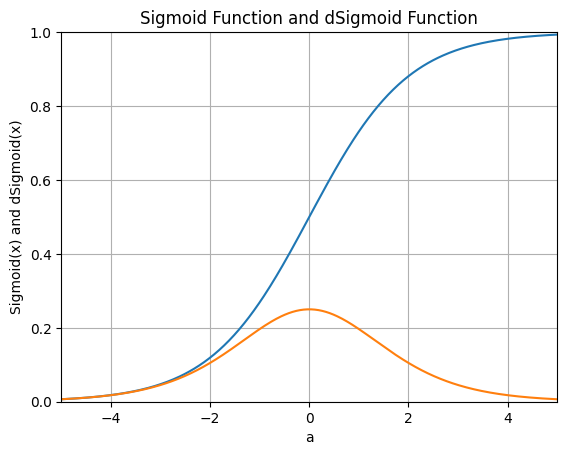

In [7]:
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 400) 

# シグモイド関数の計算
y = sigmoid(x)
# シグモイド関数の微分
dy = y * (1 - y)

# グラフの描画
plt.plot(x, y)
plt.plot(x, dy)
plt.xlabel('a')
plt.ylabel('Sigmoid(x) and dSigmoid(x)')
plt.title('Sigmoid Function and dSigmoid Function')
plt.grid(True)
plt.xlim(-5, 5)  
plt.ylim(0, 1)  
plt.show()


シグモイド関数によって, 非線形な変換ができた.  
この活性化関数の出力である $a$ を, 別の全結合層によって変換する.  
隠れ層のニューロンは $4$ つ, 出力層のニューロンは $3$ つなので, 重みの行列は, $4\times 3$ 形状に設定.

In [9]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(10, 2) 
W1 = np.random.randn(2, 4)
b1 = np.random.randn(4)
W2 = np.random.randn(4, 3)
b2 = np.random.randn(3)

h = np.dot(x, W1) + b1
a = sigmoid(h)
s = np.dot(a, W2) + b2

print(f'{h=}, {a=}, {s=}')
#print(h)
#print(a)
#print(s)

h=array([[ 0.57534349, -1.46692752, -0.58990059, -2.90141627],
       [ 1.54676943, -0.77308308, -0.28628089, -2.69930377],
       [ 1.88661806, -0.05685329, -0.24296653, -3.30629924],
       [ 1.56086015, -1.24577438, -0.21774057, -2.00540916],
       [ 2.19436182, -0.19629952, -0.09905263, -2.72807546],
       [ 0.01353401, -2.41361639, -0.69303368, -2.23765918],
       [ 2.41499439,  0.14095594, -0.05396349, -2.93932785],
       [ 2.53697982, -0.24120672,  0.04651057, -2.24225646],
       [-0.02530416, -2.03055107, -0.75974995, -2.83372139],
       [ 1.69100534, -0.58522596, -0.25247074, -2.79071941]]), a=array([[0.63999524, 0.18741007, 0.35665766, 0.0520836 ],
       [0.82444665, 0.31581255, 0.42891461, 0.06301445],
       [0.86836944, 0.4857905 , 0.43955543, 0.03535572],
       [0.82647674, 0.22343247, 0.44577891, 0.11863616],
       [0.89974206, 0.4510821 , 0.47525707, 0.06133687],
       [0.50338345, 0.08214025, 0.33335856, 0.09641929],
       [0.91796358, 0.53518076, 0.4865124 

### 1.2.2 レイヤとしてクラス化と順伝播の実装

全結合層による変換をAffineレイヤとして, シグモイド関数による変換をSigmoidレイヤとして実装する.  
レイヤとは, ネットワークの構成要素を指す. ニューラルネットワークは, 一般的に複数のレイヤー(層)から構成される. 各レイヤは, 一連のニューロンで構成され, それぞれが前のレイヤからの入力を受け取り, 活性化関数を適用した結果を次のレイヤーに送出する.

- すべてのレイヤは, メソッドとして `forward()` と `backward()` を持つ
- すべてのレイヤは, インスタンス変数として `params` と `grads` を持つ

1. `forward` メソッドは順伝播に対応する. ネットワークは入力データを受け取り, それを各レイヤを通じて順に伝播させ, 最終的な出力する. このプロセスは, ネットワークが問題の解を推測する部分に相当する.
2. `backward` メソッドは逆伝播に対応する. ネットワークは出力の誤差(予測と実際の目標値との差)を計算し, その誤差を逆方向に伝播させて各レイヤの重みを更新する. このプロセスは, ネットワークがその誤差を学習し, 次回の予測を改善するための調整を行う部分に相当する.
3. `params` は.通常, モデルの各レイヤのパラメータを保持するためのリストや配列である. 深層学習のモデルでは, パラメータは主に重みとバイアスを指す. これらのパラメータは学習過程で最適化され, モデルの予測性能を決定する.
4. `grads` は, パラメータの勾配を指す. 勾配は, パラメータを少し変化させたときの損失関数の変化量を表す. つまり, どの方向にパラメータを更新すれば損失を減らすことができるかを示す. `grads` は通常, `params` と同じ形状のリストや配列で, 各パラメータの勾配を保持する.

#### Sigmoidレイヤ

In [10]:
import numpy as np

class Sigmoid:
    def __init__(self):
        self.params = []
        
    def forward(self, x):
        return 1 / (1 + np.exp(-x))

`__init__` は, クラスのインスタンスが作成されるときに自動的に呼び出される. ここでは, `self.params` という空のリストを作成している. 

#### Affineレイヤ

In [10]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        
    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b
        return out

`__init__` ここでは, 引数として重み `w` と バイアス `b` を受け取り, これらを `self.params` というリストに格納する.  
`forward` は, アフィン変換の計算を行う. `self.params` から `w` と `b` を取り出す. 次に, `x` と `W` のドット積を計算し, `b` を加える. この結果は, `out` として返される. 

In [11]:
import numpy as np


class Sigmoid:
    def __init__(self):
        self.params = []
        
    def forward(self, x):
        return 1 / (1 + np.exp(-x))
    

class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        
    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b
        return out
    

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        # 重みとバイアスの初期化
        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)
        
        #レイヤの生成
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        
        # すべての重みをリストにまとめる
        self.params = []
        for layer in self.layers:
            self.params += layer.params
            
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x
    
x = np.random.randn(10, 2)
model = TwoLayerNet(2, 4, 3)
s = model.predict(x)
print(s)

[[-0.8602227  -0.68236671 -2.53782019]
 [-0.44363144  0.09800838 -3.2625104 ]
 [-0.10374631 -0.15317158 -3.32646691]
 [-0.54757974 -0.76066373 -2.99681902]
 [-0.16070287 -0.83923676 -3.42817493]
 [-0.78124401 -0.3455242  -2.67874961]
 [-0.77075739 -0.24336391 -2.68650522]
 [-0.28394449 -1.1955368  -3.29515211]
 [-0.26076979 -1.07945675 -3.32489556]
 [-0.527469    0.37016424 -3.19357201]]


`__init__` メソッド: このメソッドはクラスのインスタンスが作成されるときに自動的に呼び出されます. ここでは, 引数として入力サイズ `input_size` , 隠れ層のサイズ `hidden_size` , 出力サイズ `output_size` を受け取り、それぞれを `I` , `H` , `O` に格納します. 次に、これらのサイズに基づいて重み `W1` , `W2` とバイアス `b1`, `b2` をランダムに初期化します. そして、`Affine` と` Sigmoid` クラスのインスタンスを作成し、これらを `self.layers` リストに格納します. 最後に, すべてのレイヤーのパラメータを `self.params` リストにまとめます.

`predict` メソッド: このメソッドは、入力データ `x` に対するネットワークの予測を計算します. 具体的には、`self.layers` に格納された各レイヤーのforwardメソッドを順に呼び出し、入力データを順次変換していきます. 最終的な出力 `x` がネットワークの予測となります.